# Author : Ghada Kamel El-Monayer

# Email: ghadakamel92@gmail.com

# Task2 


### Prediction using Unspervised ML using(K-Means Clustering)

In [4]:
#import libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn import preprocessing

## load and read data 

In [7]:
df_iris = pd.read_csv('Iris.csv')
df_iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [8]:
#data info 
df_iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [49]:
#shape of data 
df_iris.shape

(150, 6)

In [9]:
#check null data
df_iris.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [10]:
#check duplicates
df_iris.duplicated().sum()

0

In [11]:
#decribe data and statastics 
df_iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [12]:
#corealtion between numbers of hours and score
df_iris.corr()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.716676,-0.397729,0.882747,0.899759
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000


In [13]:
#unique values in Spcies
df_iris.Species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [18]:
#encode labels
encode = preprocessing.LabelEncoder()
df_iris['Species'] = encode.fit_transform(df_iris['Species'])
df_iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


## Data Visualization 

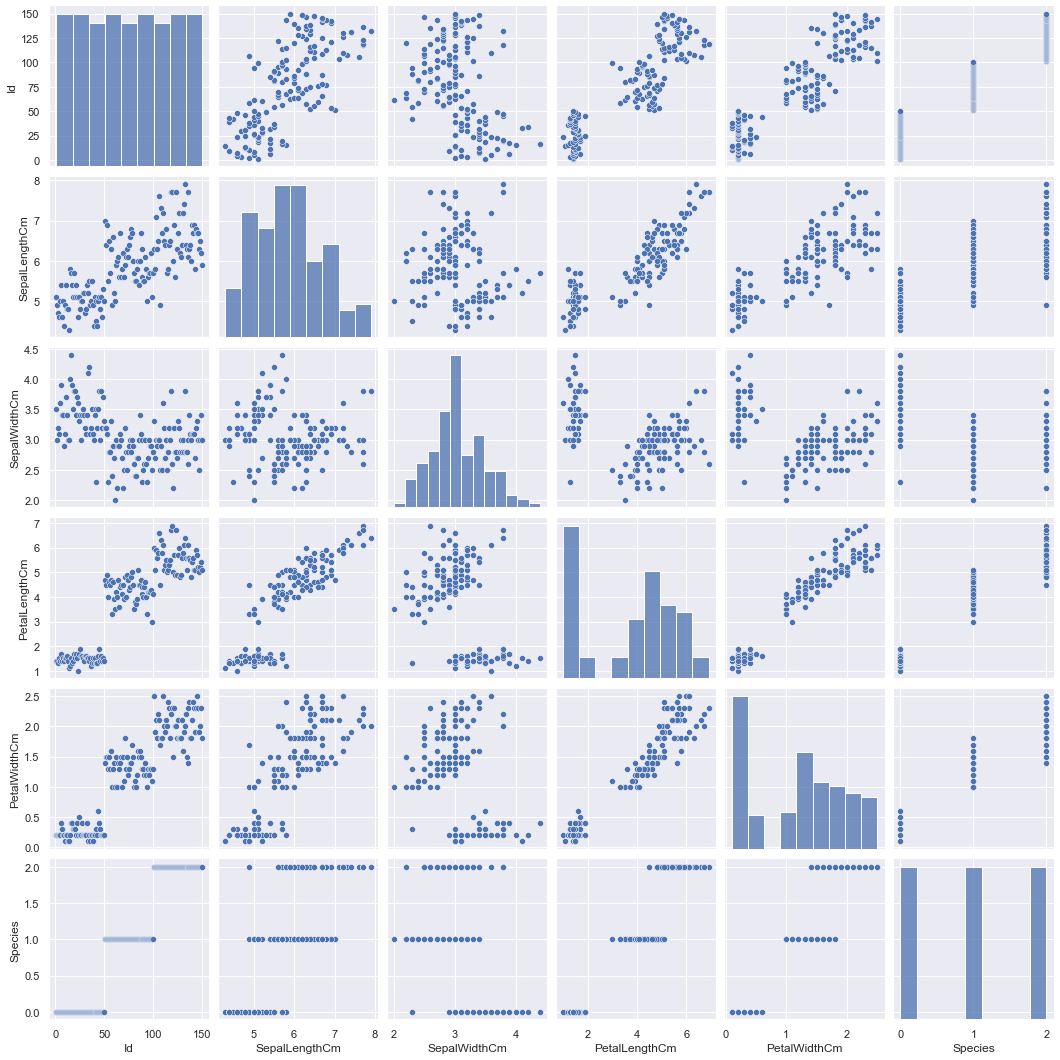

In [19]:
#Plotting pairplot of the Iris dataset
sns.set(rc={"figure.figsize":(15, 8)})
sns.pairplot(df_iris)

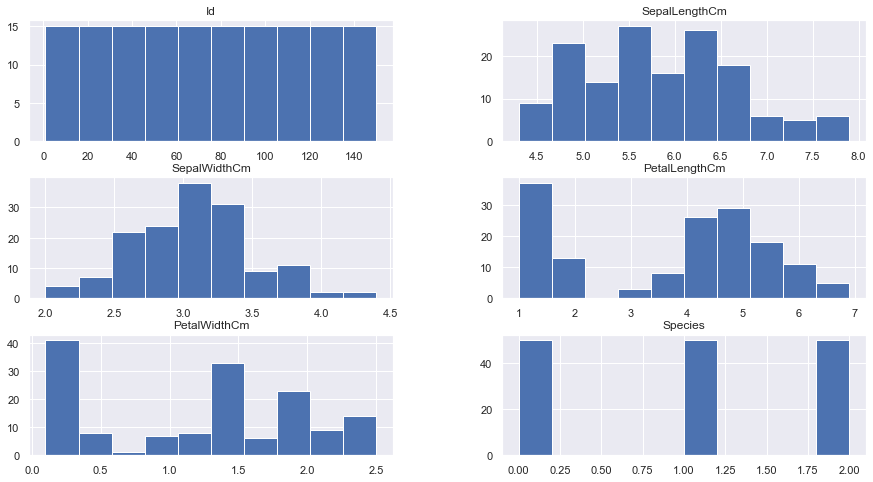

In [44]:
df_iris.hist()
plt.show()

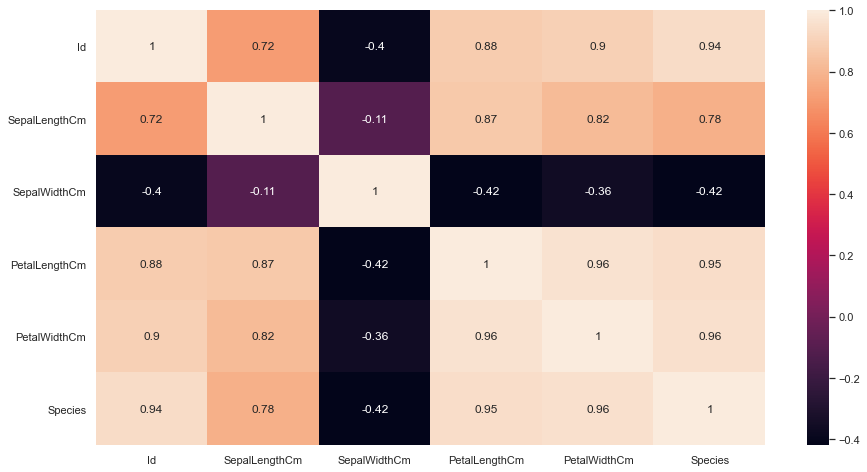

In [43]:
ax = sns.heatmap(df_iris.corr(), annot = True, linecolor='black')


## Data perparation

In [23]:
#divide data into train and target
X = df_iris.iloc[:, :-1].values
print(X)

[[1.00e+00 5.10e+00 3.50e+00 1.40e+00 2.00e-01]
 [2.00e+00 4.90e+00 3.00e+00 1.40e+00 2.00e-01]
 [3.00e+00 4.70e+00 3.20e+00 1.30e+00 2.00e-01]
 [4.00e+00 4.60e+00 3.10e+00 1.50e+00 2.00e-01]
 [5.00e+00 5.00e+00 3.60e+00 1.40e+00 2.00e-01]
 [6.00e+00 5.40e+00 3.90e+00 1.70e+00 4.00e-01]
 [7.00e+00 4.60e+00 3.40e+00 1.40e+00 3.00e-01]
 [8.00e+00 5.00e+00 3.40e+00 1.50e+00 2.00e-01]
 [9.00e+00 4.40e+00 2.90e+00 1.40e+00 2.00e-01]
 [1.00e+01 4.90e+00 3.10e+00 1.50e+00 1.00e-01]
 [1.10e+01 5.40e+00 3.70e+00 1.50e+00 2.00e-01]
 [1.20e+01 4.80e+00 3.40e+00 1.60e+00 2.00e-01]
 [1.30e+01 4.80e+00 3.00e+00 1.40e+00 1.00e-01]
 [1.40e+01 4.30e+00 3.00e+00 1.10e+00 1.00e-01]
 [1.50e+01 5.80e+00 4.00e+00 1.20e+00 2.00e-01]
 [1.60e+01 5.70e+00 4.40e+00 1.50e+00 4.00e-01]
 [1.70e+01 5.40e+00 3.90e+00 1.30e+00 4.00e-01]
 [1.80e+01 5.10e+00 3.50e+00 1.40e+00 3.00e-01]
 [1.90e+01 5.70e+00 3.80e+00 1.70e+00 3.00e-01]
 [2.00e+01 5.10e+00 3.80e+00 1.50e+00 3.00e-01]
 [2.10e+01 5.40e+00 3.40e+00 1.70e+00 2.

In [30]:
y = df_iris.iloc[:, 1].values
print(y)

[5.1 4.9 4.7 4.6 5.  5.4 4.6 5.  4.4 4.9 5.4 4.8 4.8 4.3 5.8 5.7 5.4 5.1
 5.7 5.1 5.4 5.1 4.6 5.1 4.8 5.  5.  5.2 5.2 4.7 4.8 5.4 5.2 5.5 4.9 5.
 5.5 4.9 4.4 5.1 5.  4.5 4.4 5.  5.1 4.8 5.1 4.6 5.3 5.  7.  6.4 6.9 5.5
 6.5 5.7 6.3 4.9 6.6 5.2 5.  5.9 6.  6.1 5.6 6.7 5.6 5.8 6.2 5.6 5.9 6.1
 6.3 6.1 6.4 6.6 6.8 6.7 6.  5.7 5.5 5.5 5.8 6.  5.4 6.  6.7 6.3 5.6 5.5
 5.5 6.1 5.8 5.  5.6 5.7 5.7 6.2 5.1 5.7 6.3 5.8 7.1 6.3 6.5 7.6 4.9 7.3
 6.7 7.2 6.5 6.4 6.8 5.7 5.8 6.4 6.5 7.7 7.7 6.  6.9 5.6 7.7 6.3 6.7 7.2
 6.2 6.1 6.4 7.2 7.4 7.9 6.4 6.3 6.1 7.7 6.3 6.4 6.  6.9 6.7 6.9 5.8 6.8
 6.7 6.7 6.3 6.5 6.2 5.9]


## Model:  K-means
Using the elbow method to find the optimal of clusters

In [31]:
wcss=[]
# Finding inertia on various k values
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init= 'k-means++',random_state = 0 )
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

In [33]:
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
       8, 8, 8, 8, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6])

### Elbow method

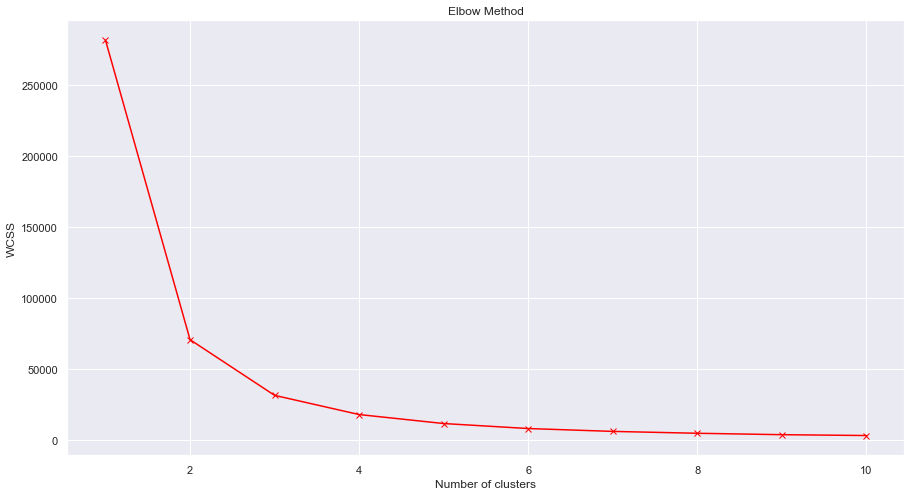

In [45]:
plt.plot(range(1,11), wcss, 'bx-', color='red')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

we realize that we have 3 clusters

## K-Means Classifier

In [37]:
kmeans = KMeans(n_clusters = 3,init= 'k-means++',random_state=0)
y_kmeans = kmeans.fit_predict(X)

In [46]:
kmeans.cluster_centers_

array([[125.5  ,   6.588,   2.974,   5.552,   2.026],
       [ 25.5  ,   5.006,   3.418,   1.464,   0.244],
       [ 75.5  ,   5.936,   2.77 ,   4.26 ,   1.326]])

<function matplotlib.pyplot.show(close=None, block=None)>

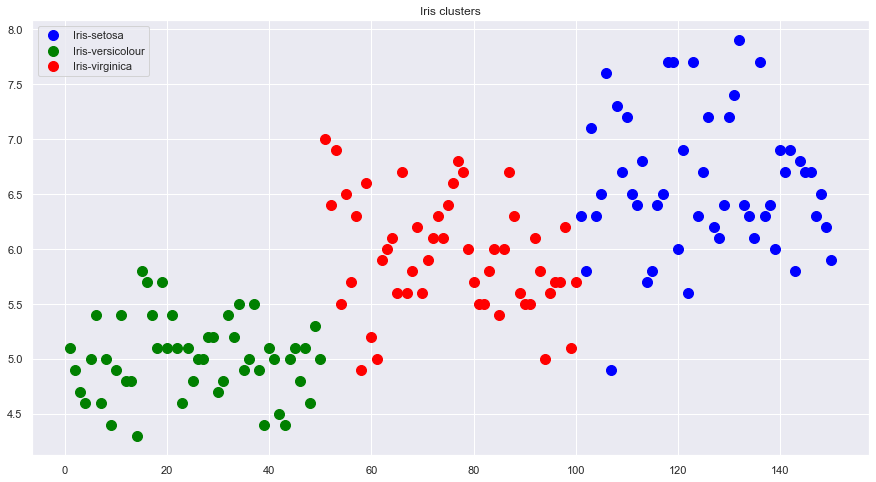

In [39]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1],s = 100, c = 'blue', label = 'Iris-setosa')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1],s = 100, c = 'green', label = 'Iris-versicolour')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1],s = 100, c = 'red', label = 'Iris-virginica')


plt.title('Iris clusters')
plt.legend()
plt.show

### Plotting the centroids of the clusters

<function matplotlib.pyplot.show(close=None, block=None)>

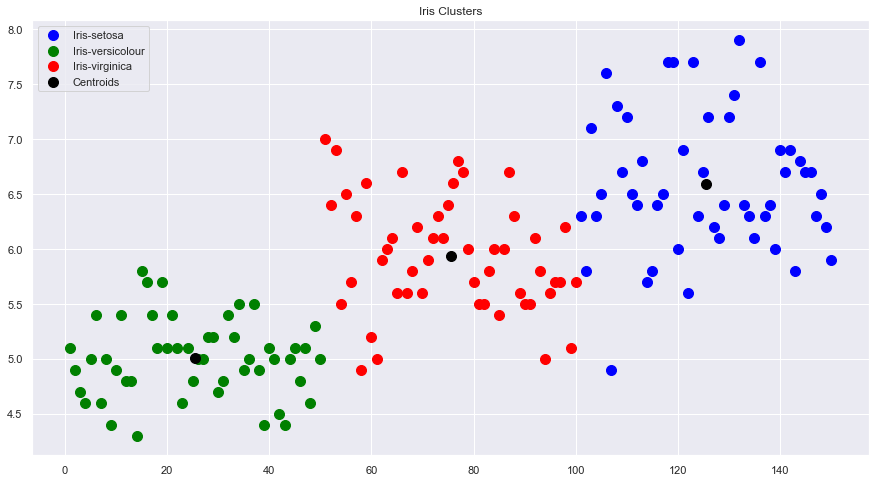

In [47]:
# Plotting the centroids of the clusters on dataset
plt.scatter(X[y_kmeans==0,0],X[y_kmeans==0,1],s=100,c='blue',label='Iris-setosa')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1],s = 100, c = 'green', label = 'Iris-versicolour')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1],s = 100, c = 'red', label = 'Iris-virginica')
plt.scatter(kmeans.cluster_centers_[:,0] ,kmeans.cluster_centers_[:,1], s=100 ,c='black',label = 'Centroids')
plt.legend()
plt.title('Iris Clusters')
plt.legend()
plt.show